In [1]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
import random
import os

In [ ]:
for batch: 
    for num: 
        if change_matrix_coeff:
            #scale = 1
            if num == '01':
                #change A
                #compute M
                #np.savetxt
            #for other num: 
            #A, B 
            #compute M
            #np.savetxt
        else: 
            #A, B 
            #set scale = 2 or 10 
            #compute M
            #np.savetxt

In [5]:
path = os.getcwd()
dir="GIMME analyses/Cleaned GIMME Data/"
numbers = ['01','02','03','04','05','06','07','08','09','10','11','12','13']
length = 75
change_matrix_coeff = False

for batch in range(1,11): #10 sets 
    for num in numbers:
        data = np.loadtxt(dir+'Control_group_output/individual/'+'10'+num+'Betas.csv', skiprows=1, usecols=range(1,9), delimiter=',')
        A = data[:,4:] #same day beta values, (4x4)
        B = data[:,:4] #lagged beta values
        
        if change_matrix_coeff:
            scale = 1
            if num == '01':
                A_changed = np.copy(A)
                A_changed[1, 0] = A_changed[0, 1] #switch SS --> VR to VR --> SS
                A_changed[0, 1] = 0
            
                VR, SS, ANX, INT = np.genfromtxt(dir+'Control_Group/10'+num+'.txt', skip_header=1, unpack=True)
                var_vr, mean_vr = np.nanvar(VR), np.nanmean(VR)  
                var_ss, mean_ss = np.nanvar(SS), np.nanmean(SS)
                var_anx, mean_anx = np.nanvar(ANX), np.nanmean(ANX)
                var_int, mean_int = np.nanvar(INT), np.nanmean(INT)

                M = np.zeros((length,4))
                t = np.arange(0,length) 
                C = np.array([var_vr, var_ss,var_anx,var_int])
                M[0,:] = np.array([mean_vr, mean_ss, mean_anx, mean_int]) + scale*np.random.randn(4)*C

                #M[r] = (I-A)^-1 * B * M[r-1] + noise + mean 
                for r in range(1,length):   
                    M[r] = np.matmul(np.matmul(np.linalg.inv(np.eye(4)-A_changed),B),M[r-1])     
                    M[r] += scale*np.random.randn(4)*C
                M[:,:] += np.array([mean_vr, mean_ss, mean_anx, mean_int])
        
                np.savetxt(path+'/Change_matrix_coeff/rep_'+str(batch)+'/ind_'+str(int(num))+'.txt', 
                           M, delimiter=',', header='VR,SS,ANX,INT', comments='')
            
            VR, SS, ANX, INT = np.genfromtxt(dir+'Control_Group/10'+num+'.txt', skip_header=1, unpack=True)
            var_vr, mean_vr = np.nanvar(VR), np.nanmean(VR)  
            var_ss, mean_ss = np.nanvar(SS), np.nanmean(SS)
            var_anx, mean_anx = np.nanvar(ANX), np.nanmean(ANX)
            var_int, mean_int = np.nanvar(INT), np.nanmean(INT)

            M = np.zeros((length,4))
            t = np.arange(0,length) 
            C = np.array([var_vr, var_ss,var_anx,var_int])
            M[0,:] = np.array([mean_vr, mean_ss, mean_anx, mean_int]) + scale*np.random.randn(4)*C
 
            for r in range(1,length):   
                M[r] = np.matmul(np.matmul(np.linalg.inv(np.eye(4)-A_changed),B),M[r-1])     
                M[r] += scale*np.random.randn(4)*C
            M[:,:] += np.array([mean_vr, mean_ss, mean_anx, mean_int])

            np.savetxt(path+'/Change_matrix_coeff/rep_'+str(batch)+'/ind_'+str(int(num))+'.txt', 
                       M, delimiter=',', header='VR,SS,ANX,INT', comments='')
            
        else:
            scale = 10
            VR, SS, ANX, INT = np.genfromtxt(dir+'Control_Group/10'+num+'.txt', skip_header=1, unpack=True)
            var_vr, mean_vr = np.nanvar(VR), np.nanmean(VR)  
            var_ss, mean_ss = np.nanvar(SS), np.nanmean(SS)
            var_anx, mean_anx = np.nanvar(ANX), np.nanmean(ANX)
            var_int, mean_int = np.nanvar(INT), np.nanmean(INT)

            M = np.zeros((length,4))
            t = np.arange(0,length) 
            C = np.array([var_vr, var_ss,var_anx,var_int])
            M[0,:] = np.array([mean_vr, mean_ss, mean_anx, mean_int]) + scale*np.random.randn(4)*C

            for r in range(1,length):   
                M[r] = np.matmul(np.matmul(np.linalg.inv(np.eye(4)-A),B),M[r-1])     
                M[r] += scale*np.random.randn(4)*C
            M[:,:] += np.array([mean_vr, mean_ss, mean_anx, mean_int])

            np.savetxt(path+'/Scale_'+str(scale)+'_noise/rep_'+str(batch)+'/ind_'+str(int(num))+'.txt', 
                       M, delimiter=',', header='VR,SS,ANX,INT', comments='')

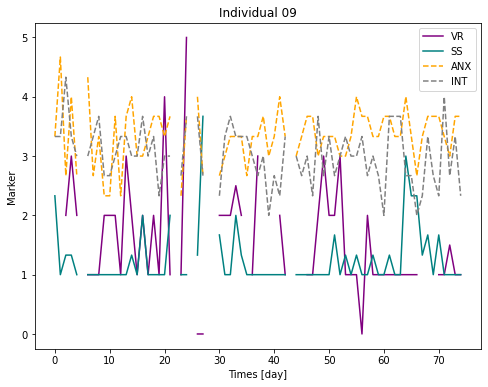

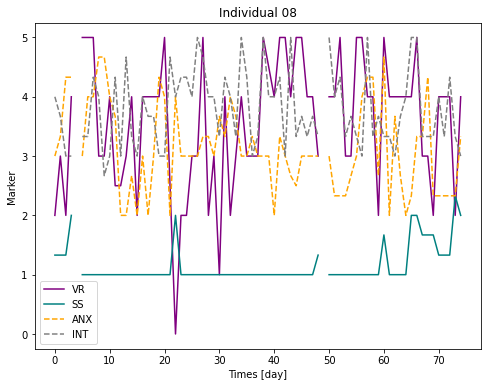

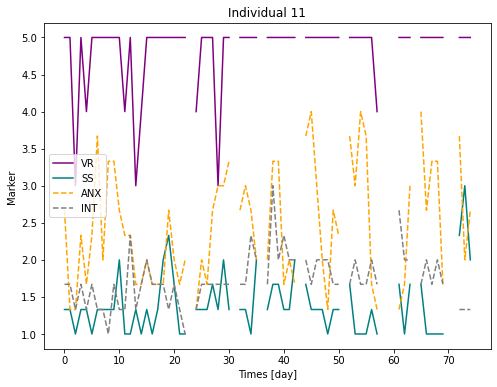

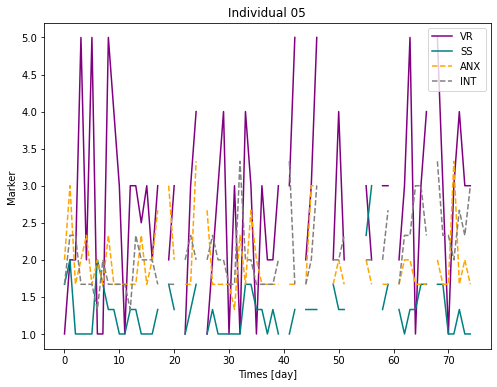

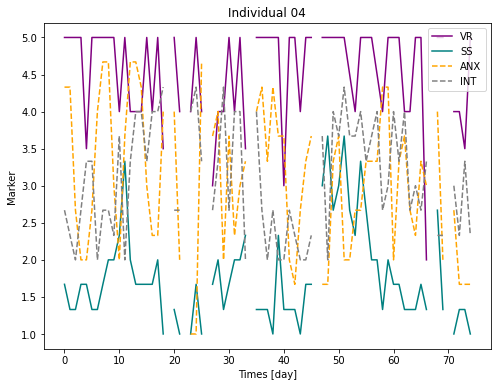

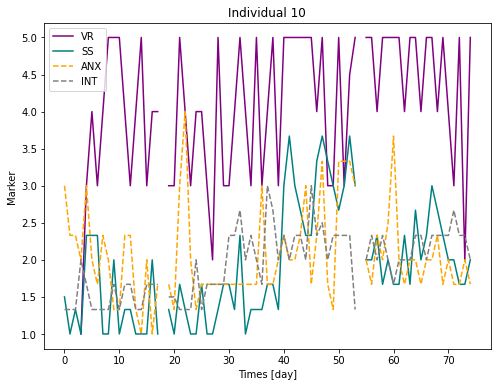

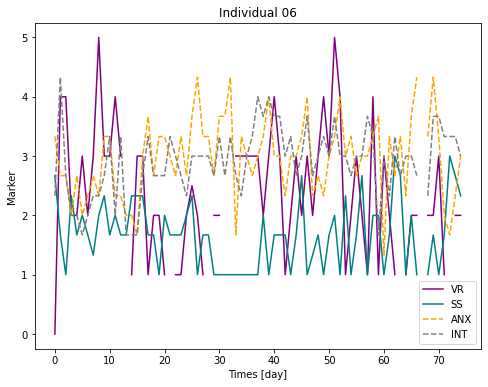

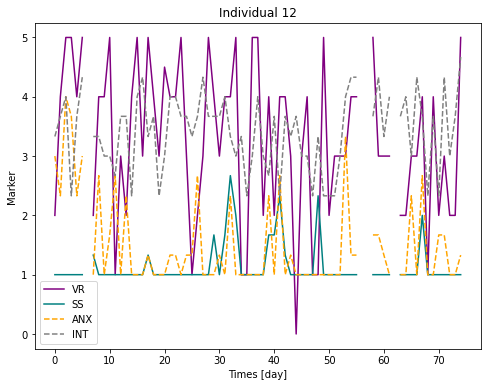

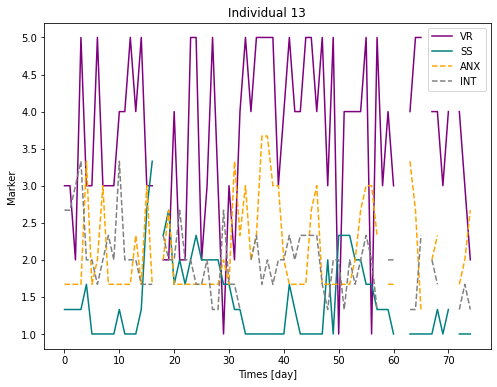

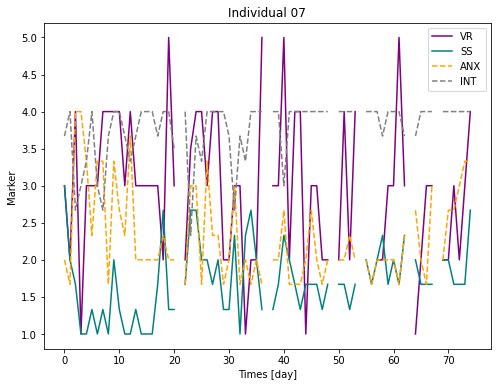

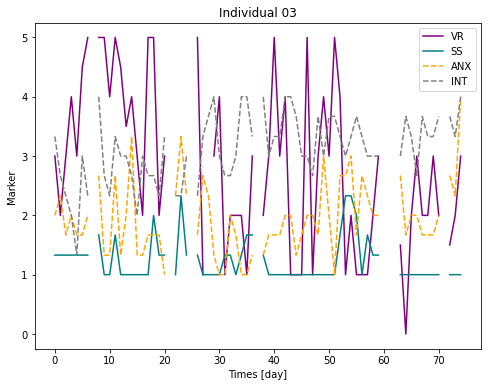

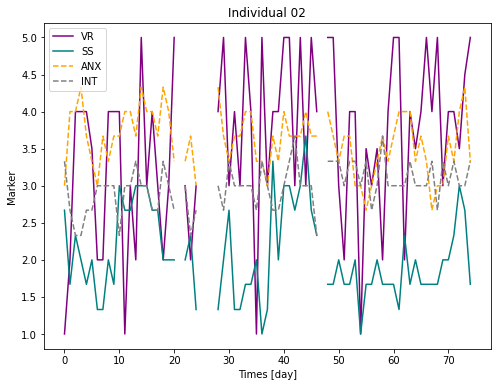

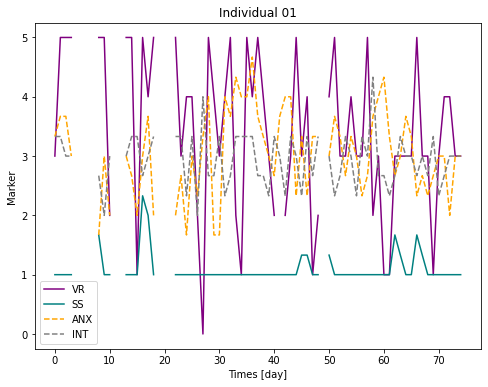

In [6]:
#Emperical data 

path = 'GIMME analyses/Cleaned GIMME Data/Control_Group'
for file in os.listdir(path): 
    VR, SS, ANX, INT = np.genfromtxt(path+'/'+file, skip_header=1, unpack=True) #'nan' values assigned 0? 
    plt.figure(figsize=(8,6))
    plt.plot(t, VR, label='VR', linestyle='-', color='purple')
    plt.plot(t, SS, label='SS', linestyle='-', color='teal')
    plt.plot(t, ANX, label='ANX', linestyle='--', color='orange')
    plt.plot(t, INT, label='INT', linestyle='--', color='gray')
    plt.legend()
    plt.xlabel('Times [day]')
    plt.ylabel('Marker')
    plt.title('Individual '+file[2:4])